In [45]:
from bayes_arcs import segment_viz, length_priors, readers, dynamic_computation as dc

In [46]:
cosmo = readers.read_all_cosmo_data()

In [47]:
cosmo_piece = cosmo[2]

In [48]:
in_loud = cosmo_piece.loudness
in_tempo = cosmo_piece.tempo
in_time = list(range(len(in_tempo)))
annot = cosmo_piece.annotations.audio[0]

In [49]:
from bayes_arcs import default_priors

In [50]:
in_data = list(zip(in_tempo[1:], in_loud[1:]))
arc_prior = [default_priors.arc_prior_tempo, default_priors.arc_prior_loud]
#length_prior_params = default_priors.length_prior_params_tempo
length_prior = length_priors.NormalLengthPrior(16, 8, range(
    len(in_data)), 30)

In [51]:
post_bound, post_segment = dc.run_alpha_beta(in_data, arc_prior=arc_prior, length_prior=length_prior, return_2d=True)

/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/bayes_arcs/dynamic_computation.py:54: RuntimeWarning: divide by zero encountered in log
  return np.log(lik_length)


excerpt_31


/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/bayes_arcs/segment_viz.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/bayes_arcs/segment_viz.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


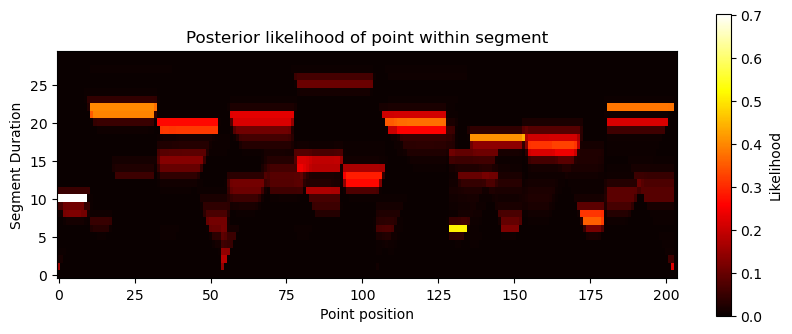

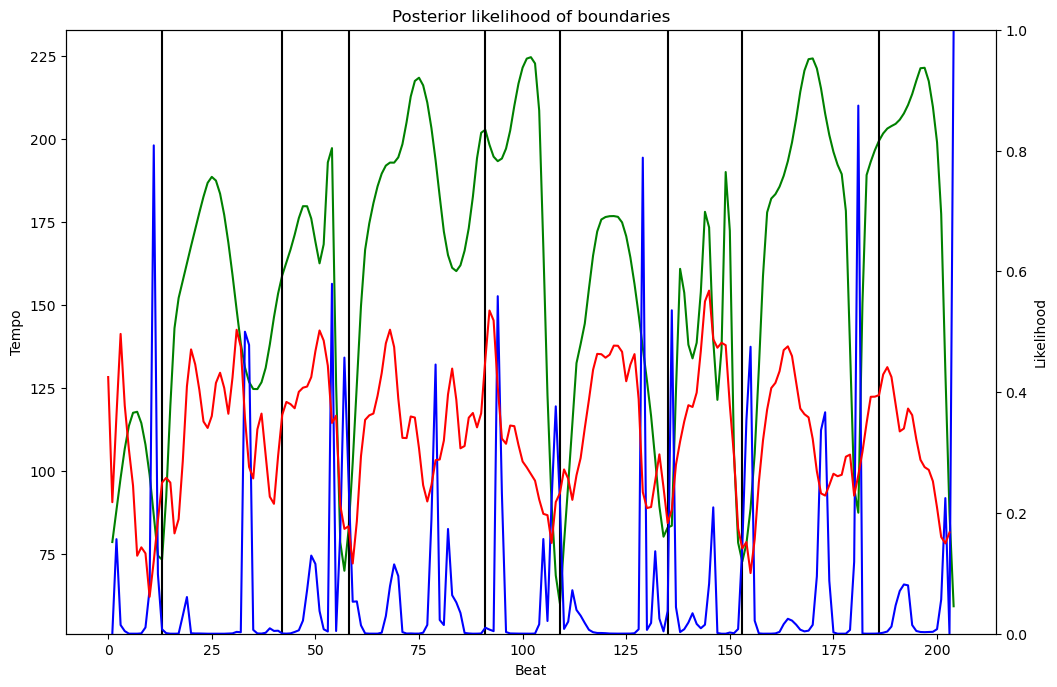

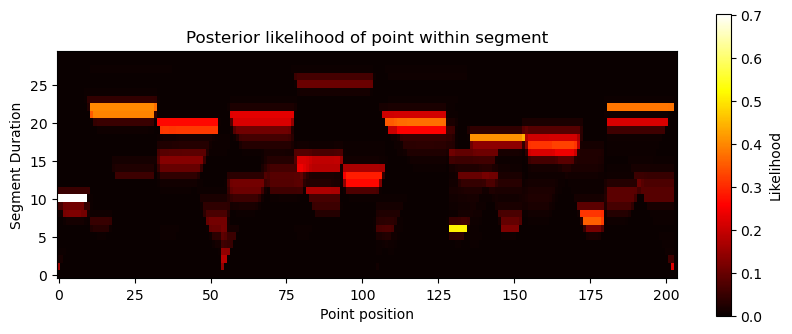

In [58]:
print(cosmo_piece.piece_id)
fig = segment_viz.plot_segment_with_signal(post_marginals=post_bound,boundaries=annot.boundaries,data_time=in_time[1:],smoothing=1,data=in_tempo[1:],input_label='Tempo', data_color='green')
fig.get_axes()[1].plot(in_loud[1:], 'red')
segment_viz.plot_segment_beams(post2_bidim=post_segment, max_length=length_prior.max_length, ratio=2.5)